In [2]:
import sys

In [3]:
sys.path.append('../../../FASTAI/fastai/')

In [4]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import *
from torch import nn

from fastai.models.cifar10.senet import SENet18
from fastai import conv_learner, dataset, dataloader
%matplotlib inline

In [5]:
from fastai.dataset import * 

In [6]:
train = pd.read_json('./data/json/train.json')

In [7]:
band1 = train.band_1.apply(lambda x: np.array(x).reshape(75, 75)) 

In [8]:
band2 = train.band_2.apply(lambda x: np.array(x).reshape(75, 75)) 

In [9]:
traindata = np.array(list(zip(band1, band2)))

In [10]:
np.random.seed(42)
train_idx = np.random.permutation(range(len(train)))[:1100]
val_idx = np.random.permutation(range(len(train)))[1100:]

In [11]:
traintensor = FloatTensor(traindata[train_idx])
validtensor = FloatTensor(traindata[val_idx])

In [12]:
traintarget = LongTensor(list(train.is_iceberg[train_idx]))
validtarget = LongTensor(list(train.is_iceberg[val_idx]))

In [13]:
train_ds = TensorDataset(traintensor, traintarget)
valid_ds = TensorDataset(validtensor, validtarget)

In [14]:
bs = 16
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)
valid_dl= DataLoader(valid_ds, batch_size=bs, shuffle=True)

In [15]:
data= ModelData(path='./', trn_dl=train_dl, val_dl=valid_dl)

In [16]:
data.c = 2

In [17]:
data.is_multi = False

In [18]:
data.trn_ds.is_reg = False

In [19]:
bm = conv_learner.BasicModel(SENet18())

In [20]:
bm.model.conv1 = nn.Conv2d(2, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

In [21]:
learner = conv_learner.ConvLearner(data, bm)

In [173]:
learner.lr_find()

A Jupyter Widget

[  0.        3.44959  80.97381   0.43359]                 



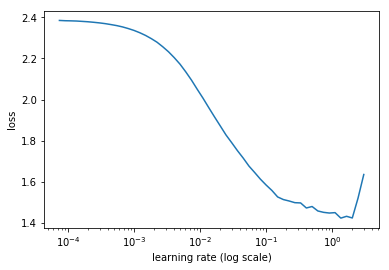

In [178]:
learner.sched.plot()

In [183]:
learner.fit(1, 2)

A Jupyter Widget

[ 0.       4.60818  6.69889  0.56836]                     
[ 1.       4.09904  1.45547  0.58008]                     



In [187]:
learner.lr_find()

A Jupyter Widget


  0%|          | 0/69 [00:00<?, ?it/s]


Exception in thread Thread-14:
Traceback (most recent call last):
  File "/home/kturgutlu/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/kturgutlu/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/kturgutlu/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration




100%|██████████| 69/69 [01:49<00:00,  1.59s/it, loss=4.87]
                                                          [  0.        4.86514  45.10982   0.43945]



In [191]:
learner.fit(0.1, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget


100%|██████████| 69/69 [01:45<00:00,  1.53s/it, loss=1.35]
                                                          [ 0.       1.35013  0.89138  0.60547]

 90%|████████▉ | 62/69 [01:38<00:11,  1.59s/it, loss=1.05]


100%|██████████| 69/69 [01:49<00:00,  1.58s/it, loss=1]
                                                       [ 1.       1.00297  0.82725  0.60156]

100%|██████████| 69/69 [01:49<00:00,  1.59s/it, loss=0.836]
                                                           [ 2.       0.83586  0.73973  0.60938]

 75%|███████▌  | 52/69 [01:22<00:26,  1.59s/it, loss=0.823]


100%|██████████| 69/69 [01:49<00:00,  1.59s/it, loss=0.826]
                                                           [ 3.       0.82626  0.65521  0.63672]

100%|██████████| 69/69 [01:50<00:00,  1.60s/it, loss=0.729]
                                                           [ 4.       0.72899  0.7128   0.5957 ]

 61%|██████    | 42/69 [01:06<00:42,  1.59s/it, loss=0.709]


100%|██████████| 69/69 [01:48<00:00,  1.58s/it, loss=0.676]
                                                           [ 5.       0.67637  0.6124   0.64844]

100%|██████████| 69/69 [01:44<00:00,  1.52s/it, loss=0.622]
                                                           [ 6.       0.62247  0.61144  0.64453]



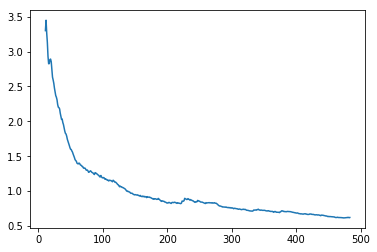

In [192]:
learner.sched.plot_loss()

In [193]:
learner.lr_find()

A Jupyter Widget


 90%|████████▉ | 62/69 [01:37<00:10,  1.57s/it, loss=2.3] 
                                                         

Exception in thread Thread-15:
Traceback (most recent call last):
  File "/home/kturgutlu/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/kturgutlu/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/kturgutlu/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



In [196]:
learner.fit(0.01, 3, cycle_len=1, cycle_mult=2, wds=5e-4)

A Jupyter Widget


  6%|▌         | 4/69 [00:05<01:37,  1.49s/it, loss=0.63]


Exception in thread Thread-17:
Traceback (most recent call last):
  File "/home/kturgutlu/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/kturgutlu/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/kturgutlu/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration




100%|██████████| 69/69 [01:45<00:00,  1.53s/it, loss=0.601]
                                                           [ 0.       0.60099  0.61006  0.65039]

 93%|█████████▎| 64/69 [01:37<00:07,  1.53s/it, loss=0.6]


100%|██████████| 69/69 [01:44<00:00,  1.52s/it, loss=0.601]
                                                           [ 1.       0.60085  0.62986  0.62305]

100%|██████████| 69/69 [01:45<00:00,  1.53s/it, loss=0.595]
                                                           [ 2.       0.59459  0.61393  0.64844]

 78%|███████▊  | 54/69 [01:22<00:22,  1.52s/it, loss=0.613]


100%|██████████| 69/69 [01:44<00:00,  1.52s/it, loss=0.607]
                                                           [ 3.       0.60732  0.60289  0.6582 ]

100%|██████████| 69/69 [01:43<00:00,  1.51s/it, loss=0.599]
                                                           [ 4.       0.59853  0.62743  0.62305]

 64%|██████▍   | 44/69 [01:07<00:38,  1.54s/it, loss=0.59]


100%|██████████| 69/69 [01:46<00:00,  1.54s/it, loss=0.592]
                                                           [ 5.       0.59186  0.61027  0.65234]

100%|██████████| 69/69 [01:52<00:00,  1.62s/it, loss=0.59]
                                                          [ 6.       0.58987  0.61335  0.64844]



In [197]:
learner.lr_find()

A Jupyter Widget


 99%|█████████▊| 68/69 [01:50<00:01,  1.62s/it, loss=3.32]
                                                          

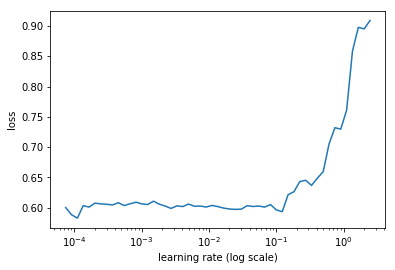

In [199]:
learner.sched.plot()

In [200]:
learner.unfreeze()

In [201]:
lr = 0.01
lrs = [lr/9, lr/4, lr]

In [202]:
learner.fit(lrs, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget


  0%|          | 0/69 [00:00<?, ?it/s]


Exception in thread Thread-18:
Traceback (most recent call last):
  File "/home/kturgutlu/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/kturgutlu/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/kturgutlu/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration




100%|██████████| 69/69 [06:15<00:00,  5.44s/it, loss=14]
                                                        [  0.       13.97498   7.69001   0.56445]

 90%|████████▉ | 62/69 [04:47<00:32,  4.64s/it, loss=9.06]


100%|██████████| 69/69 [05:21<00:00,  4.66s/it, loss=9.01]
                                                          [ 1.       9.01268  3.09826  0.57031]

100%|██████████| 69/69 [05:01<00:00,  4.37s/it, loss=5.2]
                                                         [ 2.       5.19756  2.17     0.60742]

 78%|███████▊  | 54/69 [03:42<01:01,  4.13s/it, loss=3.18]


100%|██████████| 69/69 [05:00<00:00,  4.36s/it, loss=2.55]
                                                          [ 3.       2.54789  2.32759  0.5625 ]

100%|██████████| 69/69 [04:43<00:00,  4.10s/it, loss=1.3]
                                                         [ 4.       1.29897  0.65021  0.66406]

 67%|██████▋   | 46/69 [03:04<01:32,  4.01s/it, loss=0.929]


100%|██████████| 69/69 [04:37<00:00,  4.02s/it, loss=0.819]
                                                           [ 5.       0.8188   0.66293  0.66602]

100%|██████████| 69/69 [04:30<00:00,  3.92s/it, loss=0.623]
                                                           [ 6.       0.62292  0.5639   0.67578]



In [203]:
learner.save('75')

In [ ]:
learner.fit(lrs, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget


 13%|█▎        | 9/69 [00:36<04:00,  4.01s/it, loss=0.587]

In [25]:
lr = 0.01
lrs = [lr/100, lr/20, lr]
learner.load('75')

In [26]:
learner.fit(lrs, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.52344  0.57101  0.66797]                      
[ 1.       0.52346  0.56821  0.67188]                      
[ 2.       0.51575  0.57288  0.66992]                      
[ 3.       0.52014  0.5692   0.67188]                      
[ 4.       0.529    0.56298  0.67773]                      
[ 5.       0.52599  0.57022  0.66797]                      
  4%|▍         | 3/69 [00:04<01:39,  1.51s/it, loss=0.525]

KeyboardInterrupt: 